# PRCP-1002-Handwritten Digits Recognition

---
MNIST (&quot;Modified National Institute of Standards and Technology&quot;) is the de facto “hello
world” dataset of computer vision. Since its release in 1999, this classic dataset of
handwritten images has served as the basis for benchmarking classification algorithms.
As new machine learning techniques emerge, MNIST remains a reliable resource for
researchers and learners alike.


`The project aims to analyze handwritten digits from 0 to 9 using various models to best classify images into one of the 10 classes.`

The input feature contains images of size 28x28 with 60,000 training sets and 10,000 testing sets.
Output feature contains 10 classes (digits from 0-9).

Normalization: Pixel values scaled from [0, 255] to [0, 1] for better convergence.

Reshaping:
* For CNN models -> reshaped into (28,28,1) to include channel dimension.
* For traditional models -> flattened into vectors of size (784,).

One-Hot Encoding: Converted digit labels (0–9) into categorical format for training neural networks.

## Problem Statement
- Task 1:-Prepare a complete data analysis report on the given data.
- Task 2:- Classify a given image of a handwritten digit into one of the 10 classes
representing integer values from 0 to 9.
- Task3:- Compare between various models and find the classifier that works
better.

## Model Comparison

The models include Convolutional Neural Networks (CNN), Artificial Neural Networks/Multi-Layer Perceptron (ANN/MLP), Support Vector Classifier (SVC), K-Nearest Neighbors Classifier (KNN), and Random Forest Classifier.

Distinguishing models based on accuracy :-

* CNN Accuracy ~ 99.2%

* SVC Accuracy ~ 96%

* Random Forest Accuracy ~ 97%

* KNN Accuracy ~ 93.3%

* ANN Accuracy ~ 98%



CNN clearly outperforms all other models, achieving ~99.2% accuracy. Its ability to learn spatial hierarchies in image data makes it the most suitable for MNIST digit recognition.

ANN follows closely with ~98% accuracy, capturing complex relationships but slightly less powerful than CNN for image-based tasks.

SVC achieves ~96% accuracy on subsets of data, showing strong results but limited scalability compared to neural networks.

Random Forest achieves ~97% accuracy, capable of reducing overfitting and providing stable predictions, however it cannot fully leverage spatial structures.

KNN, while being the simplest approach, still provides a ~93.3% accuracy on subsets of data, demonstrating the effectiveness in digit classification.



## Challenges

1. Risk of overfitting with deep networks.
2. Low resolution (28x28), limiting fine detail capture.
3. Variability in handwritten digits.
4. Training traditional models like SVM, KNN, Random Forests on a huge data can be slow.
5. Traditional models (like SVM and KNN) become computationally expensive with larger datasets.
6. Deep models require GPUs for efficient training.
7. For models like ANN/MLP, images need to be flattened to a 1D vector (784,). For CNNs, they must retain 2D structure (28,28,1).

To mitigate these risks:
1. Regularization Techniques like Dropout, Early Stopping can be used to prevent overfitting.
2. Normalize pixel values preventing larger gradients.
3. Optimizers to be used to improve speed and stability, Ex: Adam, rmsprop.

In [14]:
#import libraries
from PIL import Image

import os, cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


In [16]:
# load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
print(x_train.shape) #60k images of size 28*28
print(y_train.shape) 
print(x_test.shape) #10k images of size 28*28
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


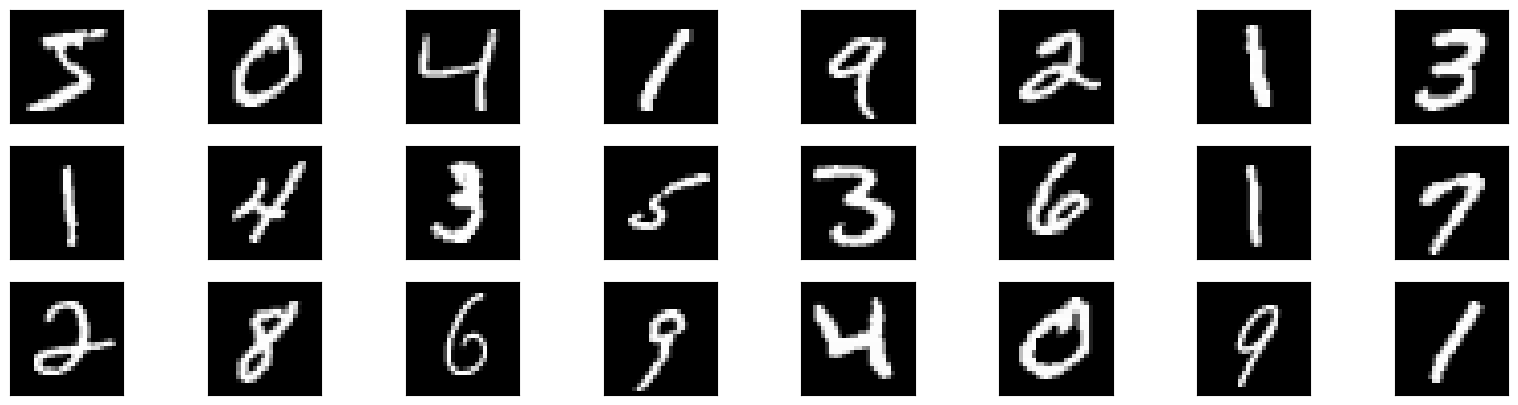

In [20]:
fig = plt.figure(figsize=(20,5))
for i in range(24):
  ax = fig.add_subplot(3,8,i+1,xticks=[],yticks=[])
  ax.imshow(x_train[i],cmap='grey')
    

## Data Preprocessing

In [22]:
#convert image into pixels
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [24]:
#Applying one-hot encoding on the labels
num_classes = len(np.unique(y_train))
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [26]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


##  Model Creation

### 1. **SVC**

In [28]:
x_train_svm = x_train.reshape(-1, 784)
x_test_svm = x_test.reshape(-1, 784)

In [30]:
x_train_svm.shape, x_test_svm.shape

((60000, 784), (10000, 784))

In [32]:
# Taking a small subset because it cannot learn on the huge data
subset = 10000
print("Training SVM on subset of 10k samples...")
svc = SVC()
svc.fit(x_train_svm[:subset], y_train[:subset])

Training SVM on subset of 10k samples...


SVC()

In [33]:
svc_tr_pred = svc.predict(x_train_svm[:subset])
svm_tr_acc = accuracy_score(y_train[:subset], svc_tr_pred)

print("SVM Accuracy:", svm_tr_acc)

SVM Accuracy: 0.9851


In [34]:
svc_pred = svc.predict(x_test_svm)
svm_acc = accuracy_score(y_test, svc_pred)

print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9594


In [35]:
pd.crosstab(y_test,svc_pred,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,969,0,2,0,0,3,3,1,2,0
1,0,1123,3,2,0,1,3,1,2,0
2,7,0,989,5,7,0,4,10,10,0
3,1,1,13,963,0,10,1,11,9,1
4,1,0,3,0,946,0,6,1,2,23
5,6,1,3,19,2,840,12,1,6,2
6,7,3,1,0,5,3,937,0,2,0
7,0,13,20,4,7,0,0,971,1,12
8,4,1,5,12,6,6,4,5,926,5


In [36]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.95      0.96      0.95       982
           5       0.97      0.94      0.96       892
           6       0.97      0.98      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [37]:
cv_svc = cross_val_score(svc,x_train_svm[:subset],y_train[:subset],cv=3)
print(cv_svc)
print(cv_svc.mean())
print(cv_svc.std())

[0.95620876 0.96249625 0.94689469]
0.9551998991140866
0.0064091350113221705


In [48]:
img = keras.preprocessing.image.load_img('download.png',color_mode = "grayscale",target_size=(28,28))

img_arr = keras.preprocessing.image.img_to_array(img)

# Flatten the image to 1D
img_arr = img_arr.reshape(1, -1)

# Normalizing
img_arr = img_arr / 255.0  

pred = svc.predict(img_arr)
print("Predicted class:", pred)

Predicted class: [3]


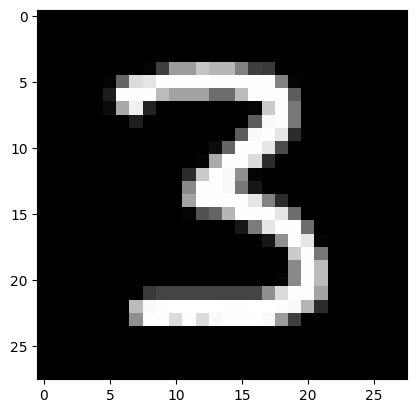

In [50]:
plt.imshow(img,cmap="grey")

### 2. **KNN**

In [43]:
x_train_knn = x_train.reshape(-1, 28*28)
x_test_knn = x_test.reshape(-1, 28*28)

In [45]:
# Using small dataset due to high memory/time
subset_knn = 5000
print("Training KNN on subset of 5k samples...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_knn[:subset_knn], y_train[:subset_knn])

Training KNN on subset of 5k samples...


KNeighborsClassifier(n_neighbors=3)

In [47]:
knn_train_pred = knn.predict(x_train_knn[:subset_knn])
knn_train_acc = accuracy_score(y_train[:subset_knn], knn_train_pred)
print(f"KNN Test Accuracy: {knn_train_acc:.4f}")

KNN Test Accuracy: 0.9704


In [49]:
knn_pred = knn.predict(x_test_knn)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Test Accuracy: {knn_acc:.4f}")

KNN Test Accuracy: 0.9339


In [51]:
pd.crosstab(y_test,knn_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,970,1,1,0,0,1,5,1,1,0
1,0,1130,0,2,0,0,3,0,0,0
2,18,32,941,6,2,0,6,21,6,0
3,4,9,9,927,1,27,1,10,16,6
4,1,23,2,0,906,0,9,1,0,40
5,7,5,1,29,7,816,13,1,6,7
6,13,7,0,0,4,4,930,0,0,0
7,1,41,6,2,8,1,0,945,0,24
8,21,8,16,22,10,21,4,10,839,23


In [55]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.89      1.00      0.94      1135
           2       0.96      0.91      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.94      0.92      0.93       982
           5       0.93      0.91      0.92       892
           6       0.96      0.97      0.96       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.86      0.91       974
           9       0.90      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [53]:
cv_knn = cross_val_score(knn,x_train_knn[:subset_knn],y_train[:subset_knn],cv=3)
print(cv_knn)
print(cv_knn.mean())
print(cv_knn.std())

[0.91061788 0.93221356 0.92436975]
0.9224003938708055
0.008925697898383603


In [57]:
img = keras.preprocessing.image.load_img('images.png',color_mode = "grayscale",target_size=(28,28))

img_arr = keras.preprocessing.image.img_to_array(img)

# Flatten the image to 1D
img_arr = img_arr.reshape(1, -1)

# Normalizing
img_arr = img_arr / 255.0  

pred = knn.predict(img_arr)
print("Predicted class:", pred)

Predicted class: [6]


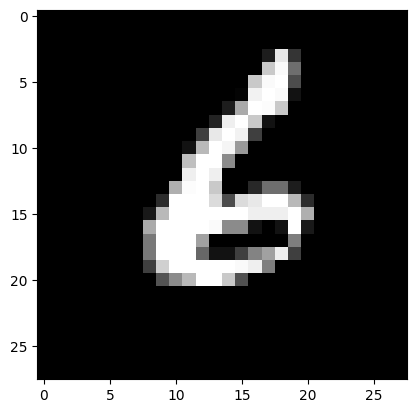

In [59]:
plt.imshow(img, cmap='grey')

### 3. **Random Forest**

In [61]:
x_train_rf = x_train.reshape(-1,784)
x_test_rf = x_test.reshape(-1,784)

In [63]:
rf = RandomForestClassifier(
    n_estimators=200,       #self-defined
    max_depth=25,            
    max_features='sqrt',     
    min_samples_split=5,    
    min_samples_leaf=2,      
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
rf.fit(x_train_rf,y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [64]:
y_train_pred = rf.predict(x_train_rf)
accuracy_score(y_train,y_train_pred)

0.9986666666666667

In [65]:
y_pred_rf = rf.predict(x_test_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_acc:.4f}")

Random Forest Test Accuracy: 0.9697


In [66]:
confusion_matrix(y_test,y_pred_rf)

array([[ 968,    0,    0,    0,    0,    2,    4,    1,    4,    1],
       [   0, 1122,    3,    4,    0,    2,    2,    0,    1,    1],
       [   6,    0,  999,    7,    2,    0,    4,    9,    5,    0],
       [   0,    0,   12,  974,    0,    4,    0,    9,    8,    3],
       [   1,    0,    2,    0,  957,    0,    5,    0,    2,   15],
       [   4,    1,    0,   10,    4,  859,    6,    2,    4,    2],
       [   8,    3,    0,    0,    4,    4,  935,    0,    4,    0],
       [   1,    3,   20,    2,    0,    0,    0,  991,    1,   10],
       [   4,    0,    5,    8,    3,    6,    2,    4,  932,   10],
       [   7,    5,    3,   10,   11,    3,    1,    5,    4,  960]],
      dtype=int64)

In [67]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [68]:
cv_rf = cross_val_score(rf,x_train_rf,y_train,cv=3)
print(cv_rf.mean())
print(cv_rf.std())

0.9632333333333333
0.0016744816776808583


In [75]:
img = keras.preprocessing.image.load_img('img.jpg',color_mode = "grayscale",target_size=(28,28))

img_arr = keras.preprocessing.image.img_to_array(img)

# Flatten the image to 1D
img_arr = img_arr.reshape(1, -1)

# Normalizing
img_arr = img_arr / 255.0  

pred = rf.predict(img_arr)
print("Predicted class:", pred)

Predicted class: [9]


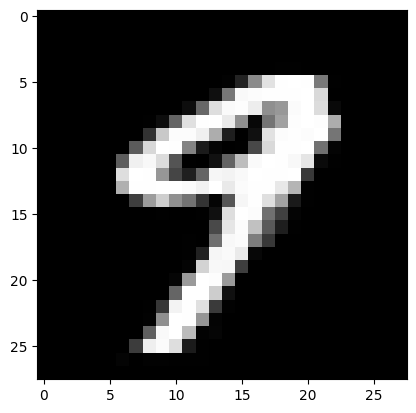

In [77]:
plt.imshow(img, cmap='grey')

### 4. **ANN**

In [79]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [81]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), 
                      activation='relu',
                      solver='adam', 
                      learning_rate_init=0.001,
                      max_iter=20,
                      random_state=42)

mlp.fit(x_train_flat,y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42)

In [83]:
#testing prediction
y_pred_test = mlp.predict(x_test_flat)

#training prediction
y_pred_train = mlp.predict(x_train_flat)

In [84]:
#Evaluating the model
print("Training accuracy :",accuracy_score(y_train,y_pred_train))
print("Test accuracy :",accuracy_score(y_test,y_pred_test))

Training accuracy : 0.9996666666666667
Test accuracy : 0.9799


In [91]:
pd.crosstab(y_test,y_pred_test,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,972,1,0,0,0,0,3,1,3,0
1,0,1126,2,3,0,0,1,1,2,0
2,4,0,1003,7,3,0,2,4,9,0
3,0,0,1,997,0,3,0,5,3,1
4,2,1,2,1,958,0,5,2,1,10
5,2,0,0,9,1,872,3,0,4,1
6,3,2,3,1,6,3,937,0,3,0
7,1,3,8,3,0,0,0,1004,2,7
8,5,0,2,11,5,2,0,2,944,3


In [93]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [95]:
cv_ann = cross_val_score(mlp,x_train_flat,y_train,cv=3)
print(cv_ann)
print(cv_ann.mean())
print(cv_ann.std())

[0.9735  0.97275 0.9719 ]
0.9727166666666666
0.0006536223850376046


In [97]:
img = keras.preprocessing.image.load_img('img.jpg',color_mode = "grayscale",target_size=(28,28))

img_arr = keras.preprocessing.image.img_to_array(img)

# Flatten the image to 1D
img_arr = img_arr.reshape(1, -1)

# Normalizing
img_arr = img_arr / 255.0  

pred = mlp.predict(img_arr)
print("Predicted class:", pred)

Predicted class: [9]


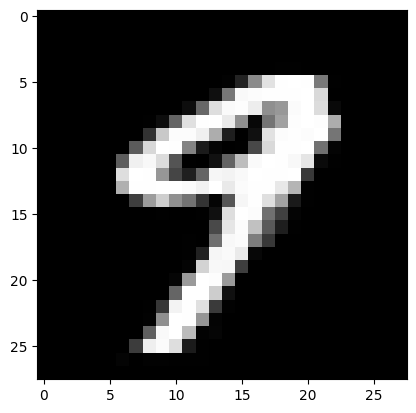

In [99]:
plt.imshow(img, cmap='grey')

### 5. **CNN**

In [101]:
# Break data into training, testing, and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000] #55000 images for training, 5000 images for validation
(y_train, y_valid) = y_train_cat[5000:], y_train_cat[:5000] #55000 images for training, 5000 images for validation

In [103]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

55000 train samples
10000 test samples
5000 validation samples


In [105]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         288,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 316,806 (1.21 MB)

 Trainable params: 316,806 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Compile Model

In [107]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### **Train the Model**

In [109]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid,y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9390 - loss: 0.1921 - val_accuracy: 0.9866 - val_loss: 0.0456
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9797 - loss: 0.0640 - val_accuracy: 0.9896 - val_loss: 0.0372
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accuracy: 0.9904 - val_loss: 0.0351
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9920 - val_loss: 0.0308
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9887 - loss: 0.0356 - val_accuracy: 0.9910 - val_loss: 0.0350
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9891 - loss: 0.0326 - val_accuracy: 0.9920 - val_loss: 0.0288
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9914 - loss: 0.0274 - val_accuracy: 0.9896 - val_loss: 0.0408
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9917 - loss: 0

In [110]:
# Loading the model with the best weights
model.load_weights("model.weights.best.keras")

In [111]:
#evaluate test accuracy 
cnn_test_loss, cnn_test_acc  = model.evaluate(x_test,y_test_cat,verbose=0)
print("Test accuracy: ", cnn_test_acc)

Test accuracy:  0.9926000237464905


In [112]:
train_loss, train_acc = model.evaluate(x_train,y_train)
print("Training accuracy: ", train_acc)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9978 - loss: 0.0069
Training accuracy:  0.9978181719779968


In [113]:
# Load and preprocess the image
img = keras.preprocessing.image.load_img(
    "img.jpg", color_mode="grayscale", target_size=(28,28)
)
img_arr = keras.preprocessing.image.img_to_array(img).astype("float32") # 28,28,1

# Add batch dimension and normalize
input_arr = np.expand_dims(img_arr, axis=0) / 255.0  # shape: (1,28,28,1)


# Predict
pred = model.predict(input_arr)
print("Raw prediction:", pred)
print("Predicted class:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Raw prediction: [[4.8565552e-13 1.3164235e-10 7.2833789e-10 1.0545473e-09 4.8614202e-06
  2.7992040e-12 2.3929860e-15 1.9706218e-07 2.5950587e-07 9.9999464e-01]]
Predicted class: 9


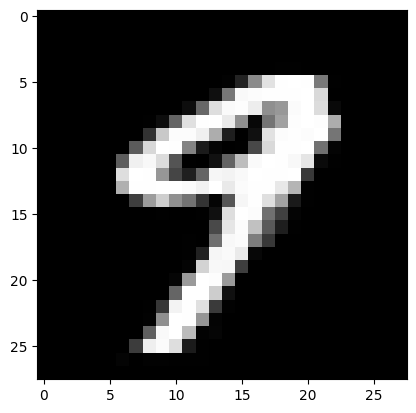

In [114]:
plt.imshow(img, cmap='grey')

In [121]:
print("Final Results:\n")
print(f"CNN Accuracy : {cnn_test_acc:.4f}")
print(f"SVM Accuracy : {svm_acc:.4f}")
print(f"KNN Accuracy : {knn_acc:.4f}")
print(f"Random Forest Accuracy : {accuracy_score(y_test,y_pred_rf):.4f}")
print(f"ANN Accuracy : {accuracy_score(y_test,y_pred_test):.4f}")

Final Results:

CNN Accuracy : 0.9926
SVM Accuracy : 0.9594
KNN Accuracy : 0.9339
Random Forest Accuracy : 0.9697
ANN Accuracy : 0.9799
